In [ ]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
from scipy import stats

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.style.use('ggplot')

In [ ]:
# Initial Data Read

df = pd.read_csv('train.csv')

# Categorical Data Label Dictionaries
color = pd.read_csv('color_labels.csv')
breed = pd.read_csv('breed_labels.csv')
state = pd.read_csv('state_labels.csv')
typedic = {1:'dog', 2:'cat'}
genderdic = {1:'Male', 2:'Female', 3:'Mixed'}
maturitydic = {1:'Small', 2:'Medium', 3:'Large', 4:'Extra Large', 0:'Not Specified'}
furdic = {1:'Short', 2:'Medium', 3:'Long', 4:'Not Specified'}
vaccdic = {1:'Vaccinated', 2:'Not Vaccinated', 3:'No Info'}
wormdic = {1:'De-wormed', 2:'Not de-wormed', 3:'No Info'}
sterildic = {1:'Sterilized', 2:'Not sterilized', 3:'No Info'}
healthdic = {1:'Healthy', 2:'Minor Injury', 3:'Serious Injury', 0:'Not Specified'}
adoptiondic = {0:  'First Day', 1: '1-7 Days', 2: '8-30 Days', 3:'31-90 Days', 4:'No Adoption'}
colordict = {0: 'NaN', 1: 'Black', 2: 'Brown', 3:'Golden', 4:'Yellow', 5:'Cream', 6:'Gray', 7:'White'}

df.head()

In [ ]:
# Next 3 cells are for defining data properties, shape, size and desriptives.

list(df.columns)

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
sns.boxplot(x=df.Type, y=df.Fee)
plt.title('Cats&Dogs Fee Box Plot')
plt.show()
sns.boxplot(x=df.Type, y=df[df.Fee > 0].Fee)
plt.title('Cats&Dogs Fee Box Plot ( Fee > 0 )')
plt.show()
plt.scatter(x=df.Breed1, y=df.Fee)
plt.title('Breed vs Fee Scatter Plot for Detecting Outliers')
plt.show()

# There are only couple of data pointsfor dogs, can be accepted as outliers, although outliers seems pretty random, needs special attention. Especially two data point shows clear outlier figures.

In [ ]:
df[df.Fee >= 1000]

# There are 6 observations outliers for the price variable.

In [ ]:
# $3000 outlier detail look.

sns.countplot(df[df.Breed1 == 103].Fee)
plt.xlabel(' 103 Breed ')
plt.show()

df103 = df[df.Breed1 == 103]
print('Priced pet cost average: ', round(df103[df103.Fee != 0].Fee.mean(),2), '(Free pets are excluded)')
print('Priced pet cost median: ', round(df103[df103.Fee != 0].Fee.median(),2), '(Free pets are excluded)')

sns.countplot(df[df.State == 41325].Fee)
plt.xlabel(' 41325 ')
plt.show()

df41325 = df[df.State == 41325]
print('Priced pet cost average: ', round(df41325[df41325.Fee != 0].Fee.mean(),2), '(Free pets are excluded)')
print('Priced pet cost median: ', round(df41325[df41325.Fee != 0].Fee.median(),2), '(Free pets are excluded)')

# Graphs shows that for both 103 coded breed and state 41325 have no data points showing that 3000 is acceptable data observation, this point is clearly an outlier.

# Among 103 breed, although most of the pets are free, the ones with adoption fees are between 30 - 550, 

In [ ]:
# $2000 outlier detail look.

sns.countplot(df[df.Breed1 == 82].Fee)
plt.xlabel(' 82 Breed ')
plt.show()

df82 = df[df.Breed1 == 82]
print('Priced pet cost average: ', round(df82[df82.Fee != 0].Fee.mean(),2), '(Free pets are excluded)')
print('Priced pet cost median: ', round(df82[df82.Fee != 0].Fee.median(),2), '(Free pets are excluded)')

sns.countplot(df[df.State == 41401].Fee)
plt.xlabel(' 41401 ')
plt.show()

df41401 = df[df.State == 41401]
print('Priced pet cost average: ', round(df41401[df41401.Fee != 0].Fee.mean(),2), '(Free pets are excluded)')
print('Priced pet cost median: ', round(df41401[df41401.Fee != 0].Fee.median(),2), '(Free pets are excluded)')

# Countplot shows that there are only two 82 coded Breed dogs available in the data set and one is without fee, other is 2000. The state wise pet prices are not high either, with mean 139.6 and median 100. 2000 fee can be accepted as outlier.

In [ ]:
# $1000 outlier detail look.

sns.countplot(df[df.Breed1 == 189].Fee)
plt.xlabel(' 189 Breed ')
plt.show()

df189 = df[df.Breed1 == 189]
print('Priced pet cost average: ', round(df189[df189.Fee != 0].Fee.mean(),2), '(Free pets are excluded)')
print('Priced pet cost median: ', round(df189[df189.Fee != 0].Fee.median(),2), '(Free pets are excluded)')

sns.countplot(df[df.State == 41326].Fee)
plt.xlabel(' 41326 ')
plt.show()

df41326 = df[df.State == 41326]
print('Priced pet cost average: ', round(df41326[df41326.Fee != 0].Fee.mean(),2), '(Free pets are excluded)')
print('Priced pet cost median: ', round(df41326[df41326.Fee != 0].Fee.median(),2), '(Free pets are excluded)')

# 189 breed prices are somewhat equally spreaded from 1 to 1000 and has a mean of 375 and median of 300. Among the same breed 1000 case might be real observation.
# The state wise pet prices are a lot more lower than the 1000, but breed wise pricing is more definitive calculation.

## This observation can't be counted as outlier.

In [ ]:
# $1000 outlier detail look.

sns.countplot(df[df.Breed1 == 206].Fee)
plt.xlabel(' 206 Breed ')
plt.show()

df206 = df[df.Breed1 == 206]
print('Priced pet cost average: ', round(df206[df206.Fee != 0].Fee.mean(),2), '(Free pets are excluded)')
print('Priced pet cost median: ', round(df206[df206.Fee != 0].Fee.median(),2), '(Free pets are excluded)')

sns.countplot(df[df.State == 41335].Fee)
plt.xlabel(' 41335 ')
plt.show()

df41335 = df[df.State == 41335]
print('Priced pet cost average: ', round(df41335[df41335.Fee != 0].Fee.mean(),2), '(Free pets are excluded)')
print('Priced pet cost median: ', round(df41335[df41335.Fee != 0].Fee.median(),2), '(Free pets are excluded)')

# 206 breed prices are somewhat equally spreaded from 50 to 1000 and has a mean of 535 and median of 600. Among the same breed 1000 case might be real observation.

# The state wise pet prices are a lot more lower than the 1000, but breed wise pricing is more definitive calculation.

## This observation can't be counted as outlier.

In [ ]:
# $1000 outlier detail look.

sns.countplot(df[df.Breed1 == 205].Fee)
plt.xlabel(' 205 Breed ')
plt.show()

df205 = df[df.Breed1 == 205]
print('Priced pet cost average: ', round(df205[df205.Fee != 0].Fee.mean(),2), '(Free pets are excluded)')
print('Priced pet cost median: ', round(df205[df205.Fee != 0].Fee.median(),2), '(Free pets are excluded)')

sns.countplot(df[df.State == 41401].Fee)
plt.xlabel(' 41401 ')
plt.show()

df41401 = df[df.State == 41401]
print('Priced pet cost average: ', round(df41401[df41401.Fee != 0].Fee.mean(),2), '(Free pets are excluded)')
print('Priced pet cost median: ', round(df41401[df41401.Fee != 0].Fee.median(),2), '(Free pets are excluded)')

# 205 breed prices are somewhat  spreaded from 100 to 1000 and has a mean of 337 and median of 300. Among the same breed 1000 case might be real outlier.

# The state wise pet prices are a lot more lower than the 1000, but breed wise pricing is more definitive calculation.

## This observation can be counted as outlier. But decision needs to be made.

# Among all possible outliers in Fee variable, only two records will be discarded as recordin errors.

In [ ]:
# Outliers in Fee variable are excluded.

df = df[df.Fee <= 1000]

In [ ]:
# Visual EDA, count plots for all variables. 
# Checking for imbalanced, skewed data. Detecting outliers.

j1 = sns.countplot(df.Type)
j1 = plt.show()
j2 = plt.hist(df.Age)
j2 = plt.xlabel('Age Distribution')
j2 = plt.show()
j3 = plt.hist(df.Breed1)
j3 = plt.xlabel('Breed 1')
j3 = plt.show()
j4 = plt.hist(df.Breed2)
j4 = plt.xlabel('Breeed 2')
j4 = plt.show()

for i in df.columns[5:16]:
    plt.figure()
    sns.countplot(df[i])

j5 = plt.hist(df.Fee)
j5 = plt.show()
j6 = sns.countplot(df.State)
j6 = plt.show()
j7 = sns.countplot(df.VideoAmt)
j7 = plt.show()

for i in df.columns[22:24]:
    plt.figure()
    sns.countplot(df[i])


## Age looks like exponential distribution, most of the pets rescued are puppies or kittens. There are extreme points 225 months old. 
# Outlier inspection is needed.

## Breed is highly complex and skewed. Most of the breeds are either, mixed breeds or unknown. 
# Upon further analyse, mixed breeds label might be disgregarded.

## Not all pets have secondary and third colors. First color variable is from 1-7, other 2 color variables has big pile on color code 0.
# This also needs to be taken into consideration, for further analyses.

## MaturitySize might have an outlier, most of the data is coded for the first three codes.

## Health also has couple extereme codes, might be an outlier.

## Quantity variable has almost no distribution. Almost all pets are only one.

## Statewise distribution is imbalanced. Might have demographic or economic reasons behind.

## Almost no pets have video.

## Picture amount varies but there might be extreme cases.

## Adoption speed seems consistent. But PetSaver focuses on identifying adoption logic and increasing the speed of adoption. And the time frame between codes are different. Time definitely has some effect on adoption. This might be modelled too.

In [ ]:
# For computational ease, string variables are seperated.

df = df.drop(['Name', 'Description', 'RescuerID', 'PetID'], axis=1)

df.info()

In [ ]:
# Boxplots for more in depth visualizations to detect outliers. Not all boxplots will be useful but it is computationally easy to do
for i in df.columns:
    plt.figure()
    sns.boxplot(df[i])
    plt.show()



## Since most pets are puppies or kittens, as we identified on the count plots, there are extreme cases in the data. There are too many cases above the IQR, this is because our data is highly skewed. Outliers should be defined with domain knowledge and statistical sense.

## As in the count plots, cumulation towards mixed breeds, holds the IQR on these breed codes.

## Since not too many pets have 2nd breed this data is also, tricky to use.

# Not many boxplots are meaningful, since there are 3 possible cases and all coded accordingly. But this is auto generated plotting, only meaningful plots are taken into consideration.

## Photo amount has some extreme cases, might be labeled as outliers. Count plot also supports.

In [ ]:
# It seems data has no missing points but some codings are effecting our judgement. For some highly effected variables,
# zero coded cases are treated as missing data points and boxplots are checked for outlie, detection.

sns.boxplot(df[df.Fee > 0].Fee)
plt.show()
sns.boxplot(df[df.Quantity > 1].Quantity)
plt.show()
sns.boxplot(df[df.VideoAmt > 0].VideoAmt)
plt.show()

# Although 1000 data points for price didn't considered as outliers. Non-free price plot also indicates that there are quite some extreme prices, and we will re-evaluate our outlier borders for FEE variable.

# Most of the pets are unique and only one of its kind. Although, above box-plot excluded single pets, there are extreme values.

# Almost all of the data had no VideoAmt, when we exclude 0 cases, there are still couple extreme cases.

In [ ]:
# Outliers in the Fee variable.

plt.hist(df[df.Fee > 400].Fee)
plt.title('Fee above $400')
plt.show()

print('Fee > 400 Count: ',df[df.Fee > 400].Fee.count())
print('Fee > 500 Count: ',df[df.Fee > 500].Fee.count())
print('Fee > 600 Count: ',df[df.Fee > 600].Fee.count())
print('Fee > 700 Count: ',df[df.Fee > 700].Fee.count())
print('Fee > 800 Count: ',df[df.Fee > 800].Fee.count())
print('Fee > 900 Count: ',df[df.Fee > 900].Fee.count())
print('Fee > 1000 Count: ',df[df.Fee > 1000].Fee.count())

# $600 seems another good cut point but to be conservative only $1000 cases will be marked as outliers and removed.

df = df[df.Fee < 1000]

In [ ]:
# Outliers in the Age variable.

plt.hist(df[df.Age > 24].Age)
plt.title('Age > 24')
plt.show()
sns.boxplot(df[df.Age > 24].Age)
plt.show()

print('Age > 100 Count: ', df[df.Age > 100].Age.count())
print('Age > 150 Count: ', df[df.Age > 150].Age.count())
print('Age > 200 Count: ', df[df.Age > 200].Age.count())
print('Age > 250 Count: ', df[df.Age > 250].Age.count())

# 100 months old, seems a good cutpoint but 150 months will be defined as outlier threshold.

df = df[df.Age < 150]

In [ ]:
# Maturity Size in detail

for i, j in maturitydic.items():
    count = df[df.MaturitySize == i].MaturitySize.count()
    perc = round(count/len(df.MaturitySize),3)
    print(j, ' Count: ', count, ' -- Percentage : ', perc ) 

In [ ]:
#Health in detail

for i, j in healthdic.items():
    count = df[df.Health == i].Health.count()
    perc = round(count/len(df.Health),3)
    print(j, ' Count: ', count, ' -- Percentage: ', perc)
    


In [ ]:
# Checking Adoption Speed

for i, j in adoptiondic.items():
    count = df[df.AdoptionSpeed == i].AdoptionSpeed.count()
    perc = round(count/len(df.AdoptionSpeed),2)
    print(j, ' Count: ', count, ' -- Percentage: ', perc)    


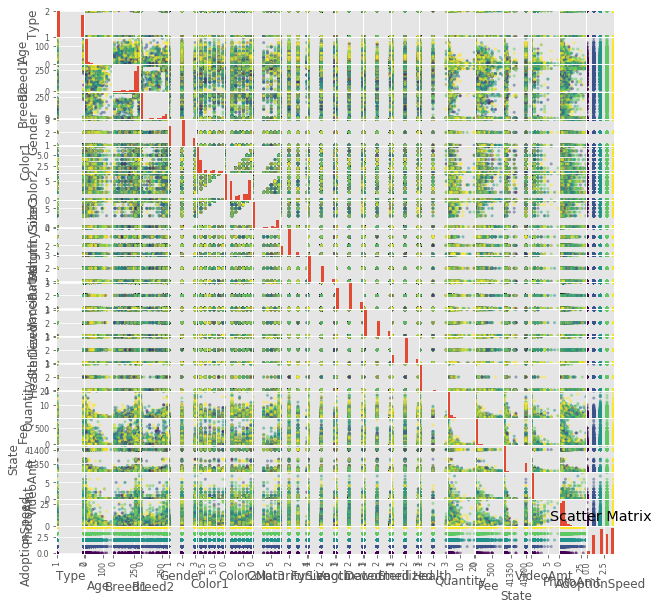

In [ ]:
pd.plotting.scatter_matrix(df, c=df.AdoptionSpeed, figsize=[10,10])
plt.title('Scatter Matrix')
plt.show()

In [ ]:
dff = df.groupby('Type')

In [ ]:
dff.describe()

In [ ]:
df = df.rename(columns={'Breed1' : 'zBreed1', 'Breed2' : 'zBreed2', 'State' : 'zState'})
df = df.reindex(sorted(df.columns), axis=1)

In [ ]:
dog = df[df.Type == 1]
cat = df[df.Type == 2]

In [ ]:
sns.countplot(cat.AdoptionSpeed)
plt.title('Cat Adoption Speed')
plt.show()

print('CATS')
for i, j in adoptiondic.items():
    count = cat[cat.AdoptionSpeed == i].AdoptionSpeed.count()
    perc = round(count/len(cat.AdoptionSpeed),2)
    print(j, ' Count: ', count, ' -- Percentage: ', perc)

print(' ')

sns.countplot(dog.AdoptionSpeed)
plt.title('Dog Adoption Speed')
plt.show()

print('DOGS')
for i, j in adoptiondic.items():
    count = dog[dog.AdoptionSpeed == i].AdoptionSpeed.count()
    perc = round(count/len(dog.AdoptionSpeed),2)
    print(j, ' Count: ', count, ' -- Percentage: ', perc)

In [ ]:
# Are there any differences between two types of pets, adoption speed. 
# H0 : Medians of the both groups are equal.
# Ha : Medians of the both groups are not equal.

print(stats.kruskal(cat.AdoptionSpeed, dog.AdoptionSpeed))

# There is a significant difference between cats and dogs. They are coming from different populations.

In [ ]:
for i in dog.columns:
    print('Adoption Speed and', i, 'Crosstab for DOGS')
    print(' ')
    print(pd.crosstab(dog.AdoptionSpeed, dog[i]))
    print(' ')

# Adoption Speed and Age relation needs special care, there is a big increase among 24 months of age pets. And 1-5 months are most popular ages.

# Black and Brown colors are most popular colors. Gray and White is also favorable.

# Deworming is important while adopting.

# Fee is important during adoption.

# Furlength is important during adoption.

# Gender is not an important criteria but Female pets are slightly favorable.

# Healthy pets are favorable.

# Medium sized dogs are popular sized pets.

# Photo amounts matter, especially longer waiting periods might be preventable with more photos. Optimum number of photos needs to be defined.

# Competition might have negative effect among same types of dogs.

# Non-sterilized dogs are more in favor. Reason behind that needs to be uncovered.

# Vaccination is not so important.

# Video is not the primary criteria.

# Breed matters but since the biggest proportion is labeled as Mixed Breed, needs special care.

# There are either pet friendly states or pet available states, this needs further examination.

In [ ]:
for i in cat.columns:
    print('Adoption Speed and', i, 'Crosstab for CATS')
    print(' ')
    print(pd.crosstab(cat.AdoptionSpeed, cat[i]))
    print(' ')

# 1-5 months are most popular ages.

# Color preference spread among the colors.

# Deworming is not important while adopting.

# Fee is important during adoption.

# Furlength is important during adoption. Short furs are more favorable.

# Gender is not an important criteria.

# Healthy pets are favorable.

# Medium sized cats are popular sized pets. Large sizes are less likely to be adopted.

# Photo amounts matter, especially longer waiting periods might be preventable with more photos. Optimum number of photos needs to be defined.

# Competition might have negative effect among same types of cats.

# Non-sterilized dogs are more in favor. Reason behind that needs to be uncovered.

# Vaccination is important.

# Video is not the primary criteria.

# Breed matters among the cats.

# There are either pet friendly states or pet available states, this needs further examination.

In [ ]:
# Is there any relation among the dependent and independent variable?

for i in df.columns:
    for j in df.columns:
        ctab = pd.crosstab(df[i], df[j])
        ctab = np.array(ctab)
        chi, p, degf, expe = stats.chi2_contingency(ctab)
        print(i, ' vs', j)
        print(' ')
        #print('Chi-Squared Results: ', round(p, 4))
        if p< 0.05:
            print(' ')
            print('H0 is rejected.', i, ' and', j, ' independent from each other')
        else:
            print("H0 can't be rejected.", i, ' and', j, 'are not independent from each other')
        print(' ')

In [ ]:
# MACHINE LEARNING

In [ ]:
mldf = df

labels = {'Color1':colordict, 'Color2':colordict, 'Color3':colordict, 'Dewormed':wormdic, 'FurLength':furdic
          , 'Gender':genderdic, 'Health':healthdic, 'MaturitySize':maturitydic, 'Sterilized':sterildic, 'Type':typedic
          , 'Vaccinated':vaccdic}

mldf.replace(labels, inplace=True)

mldf.head()

In [ ]:
mldf = pd.get_dummies(mldf, drop_first=True)
mldf.head()

In [ ]:
mldf.columns

In [ ]:
tempdf = mldf[['zBreed1', 'zBreed2', 'zState']]

mldf = mldf.drop(['zBreed1', 'zBreed2', 'zState'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

y = mldf.AdoptionSpeed.values

X = mldf.drop('AdoptionSpeed', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1618, stratify=y)



In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn_perf = []
y_knn = np.empty(20)

for i in list(filter(lambda x: x % 2 != 0, list(range(1,20)))): 
    knn = KNeighborsClassifier(n_neighbors=i)
    cv_knn = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    knn_perf.append(cv_knn.mean())
    
# Version without CV

#neighbor=np.arange(1,11)
#knn_scr = np.empty(10)
#knn_scrt = np.empty(10)

#for i in range(1,10):
#    knn = KNeighborsClassifier(n_neighbors=i+1)
#    knn.fit(X_train, y_train)
#    knn_scrt[i] = knn.score(X_train, y_train)
#    knn_scr[i] = knn.score(X_test, y_test)
    
#knn_plot = plt.plot(neighbor, knn_scr, color='blue')
#knn_plot = plt.plot(neighbor, knn_scrt, color='orange')
#knn_plot = plt.title('kNN Train and Test Accuracy Chart')
#knn_plot = plt.legend(['Basic kNN Score', 'Training Score'])
#knn_plot = plt.show()

#print(knn_scr[5])



[0.3117480688249521, 0.30398414336616253, 0.31475280648781095, 0.32326032145463635, 0.3297702051954579, 0.34078754951965273, 0.3371183771674722, 0.3413722689435635, 0.3474654229098474, 0.3462932560303418]


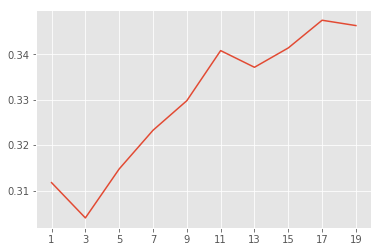

In [39]:
print(knn_perf, )
plt.plot(list(filter(lambda x: x % 2 != 0, list(range(1,20)))), knn_perf)
plt.xticks(list(filter(lambda x: x % 2 != 0, list(range(1,20)))))
plt.show()

In [41]:
# Some Preliminary Random Forest
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import RandomizedSearchCV

In [42]:
%%time

# Off the shelf Random Forest
rf = RandomForestClassifier()
cv_rf = cross_val_score(rf, X_train, y_train, cv=10, scoring='accuracy')
print('Off the shelf Random Forest 10 Fold CV Score')
print(cv_rf.mean())
print(' ')

#Parameter Tuning with RandomGrid
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=50, cv=3)
rf_random.fit(X_train, y_train)
print(rf_random.best_params_)

Off the shelf Random Forest 10 Fold CV Score
0.34137583042112296
 


KeyboardInterrupt: 

In [ ]:
rf_random.score(X_test, y_test)

0.38584779706275035

In [43]:
#Some SVM 
from sklearn.svm import SVC

In [ ]:
%%time

svc = SVC()
svc.fit(X_train, y_train)
y_svc = svc.predict(X_test)
svc_score = svc.score(X_test, y_test)
print('Off the shelf SVC Score')
print(svc_score)
print(svc.get_params)
print(' ')

svc_c = [0.01, 0.1, 1, 10, 100]
svc_g = [0.1, 1, 10]
svc_k = ['rbf']

svc_grid = {'C':svc_c, 'gamma':svc_g, 'kernel': svc_k}

svc_random = RandomizedSearchCV(svc, svc_grid, n_iter=10, cv=3)
svc_random.fit(X_train, y_train)
print(svc_random.best_params_)

In [ ]:
svc_random.score(X_test, y_test)

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression(multi_class:'auto')
logreg.fit(X_train, y_train)
y_logreg = logreg.predict(X_test)

logreg_score = logreg.score(X_test, y_test)
print(logreg_score)

solver = ['lbfgs', 'liblinear']
logreg_c = [0.01, 0.1, 1, 10, 100]
logreg_grid = {'solver':solver, 'C':logrec_c}

logreg_random = RandomizedSearchCV(logreg, logreg_grid, n_iter=15, cv=3)
logreg_random.fit(X_train, y_train)
print(logreg_random.best_random_)

In [ ]:
logreg_random.score(X_test, y_test)

In [ ]:
# Bayesian Methods
from sklearn.naive_bayes import MultinomialNB

In [ ]:
multinb = MultinomialNB(multi_class:'auto')
multinb.fit(X_train, y_train)
y_multinb = multinb.predict(X_test)

multinb_score = multinb.score(X_test, y_test)
print(multinb_score)